# Loan Data Exploration
##  by [AbdElrhman Mohamed](https://www.linkedin.com/in/abdelrhman-m/)

## Investigation Overview

> Have you ever gone to buy a house? and find out that your neighbor got the same house at a lower cost but he bought it at another time of the year!

> or have you ever bought a number of lamps for your new house? and find out someone gets the lamps with less price because he bought one or two more light lamps

> Going to take a loan from a bank or any investor company is same.
> you want to take a loan with the interest rate so you get it with the lowest cost, the good amount with the longest term possible for returning it back.



## Dataset Overview

> we have data from [Prosper](https://www.prosper.com/about) which was founded in 2005 as the first peer-to-peer lending marketplace in the United States. and the data of about 110,000 loans from **2005-2014** and the data contains 'Term', 
Loan Status, Borrower Rate, Estimated Loss, Estimated Return, loan orginal amount and much more.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set()
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_loan.csv')
df.head()

,ListingKey,Term,LoanStatus,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,EmploymentStatus,...,IncomeRange,TotalProsperLoans,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,Investors,LoanOriginationQuarterofyear,CreditScore,log_EstimatedLoss,cr_borrower_rate
0,1021339766868145413AB3B,36,Completed,0.1580,NaN,NaN,NaN,NaN,Not Available,Self-employed,...,"$25,000-49,999",0,9425,2007_Q3,330.43,258,Q3,649.5,NaN,0.540612
1,10273602499503308B223C1,36,Current,0.0920,0.0249,0.05470,A,7.0,Home Improvement,Employed,...,"$50,000-74,999",0,10000,2014_Q1,318.93,1,Q1,689.5,-1.603801,0.451436
2,0EE9337825851032864889A,36,Completed,0.2750,NaN,NaN,NaN,NaN,Not Available,Not available,...,Not displayed,0,3001,2007_Q1,123.32,41,Q1,489.5,NaN,0.650296
3,0EF5356002482715299901A,36,Current,0.0974,0.0249,0.06000,A,9.0,Motorcycle,Employed,...,"$25,000-49,999",0,10000,2012_Q4,321.45,158,Q4,809.5,-1.603801,0.460101
4,0F023589499656230C5E3E2,36,Current,0.2085,0.0925,0.09066,D,4.0,Home Improvement,Employed,...,"$100,000+",1,15000,2013_Q3,563.97,20,Q3,689.5,-1.033858,0.592974


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What affects the borrower’s APR or interest rate?

>'EstimatedLoss' and 'EstimatedReturn' dimensions are all highly correlated with one another, and all of them are also highly correlated with 'BorrowerRate' Since BorrowerRate is a measure of loan cost, it's not too surprising that the overall trend between BorrowerRate and the two individual estimations.
> and the amount of the loan have really week corelation with the borrower

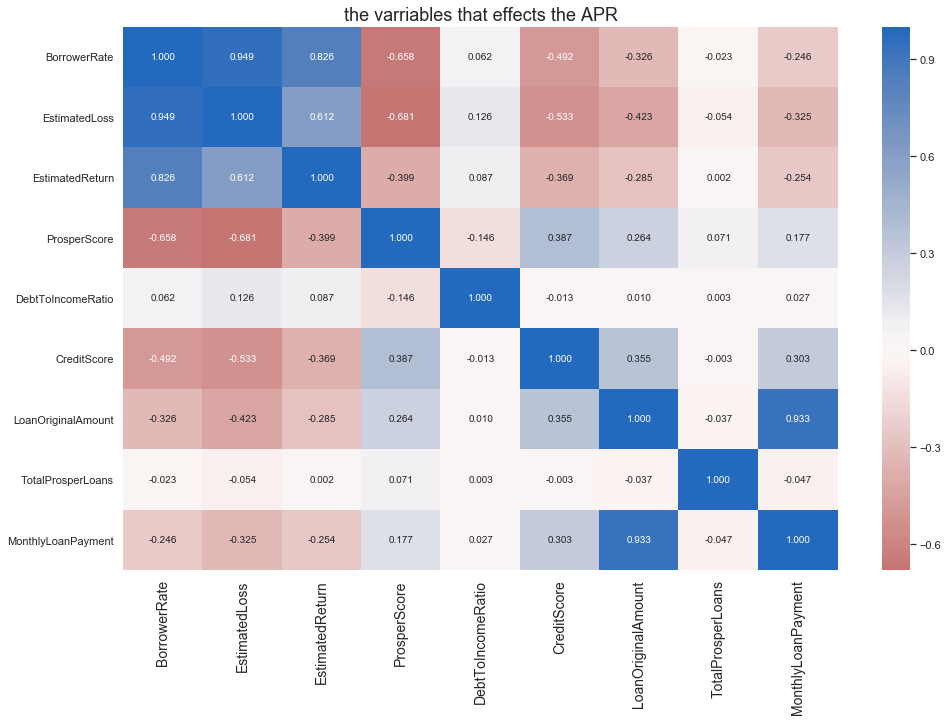

In [3]:
numeric_vars = ['BorrowerRate', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore', 'DebtToIncomeRatio', 'CreditScore','LoanOriginalAmount' ,'TotalProsperLoans', 'MonthlyLoanPayment']
categoric_vars = ['Term', 'ProsperRating','LoanOriginationQuarterofyear','IncomeRange']

# correlation plot

plt.figure(figsize = [16, 10])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('the varriables that effects the APR',fontsize=18)
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()


## How the Estimated Loss effects the interest rate?

> As the Estimated Loss increase, the  interest rate increase in the same direction.

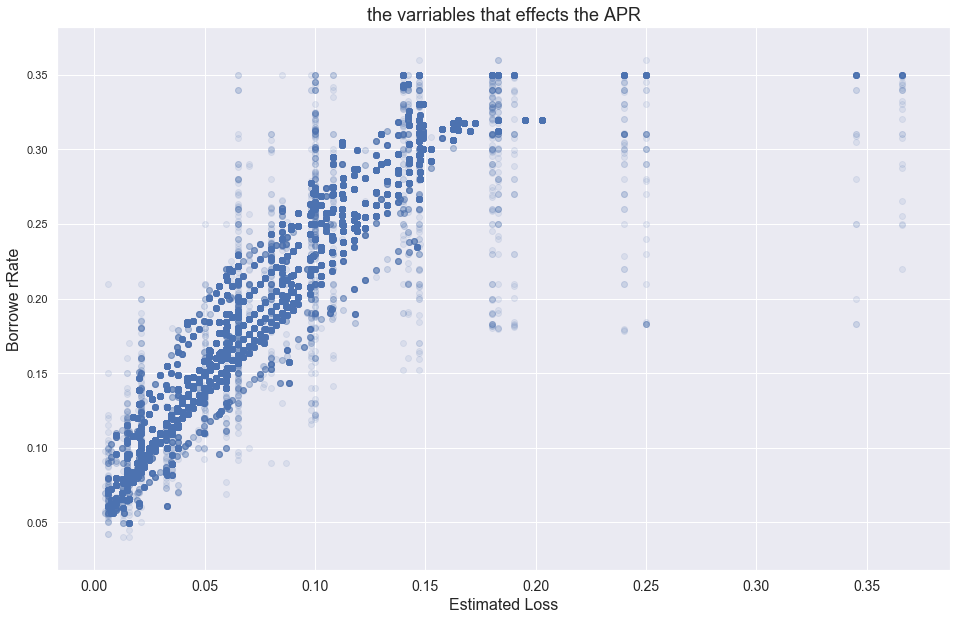

In [4]:
plt.figure(figsize = [16, 10])
plt.title('The Esrimated Loss effect on the interest rate')
plt.scatter(data = df, x = 'EstimatedLoss', y = 'BorrowerRate', alpha = 1/10)
plt.xlabel('Estimated Loss',fontsize=16)
plt.ylabel('Borrowe rRate',fontsize=16)
plt.title('the varriables that effects the APR',fontsize=18)
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

## what's the best time of the year to take aloan with the lowest cost?
> The best time is in the frist Quarter of year as with average interest rate of **0.17** (between 0.12 and 0.25)



In [5]:
df.groupby('LoanOriginationQuarterofyear')['BorrowerRate'].mean()

LoanOriginationQuarterofyear
Q1    0.176477
Q2    0.196652
Q3    0.200528
Q4    0.191008
Name: BorrowerRate, dtype: float64

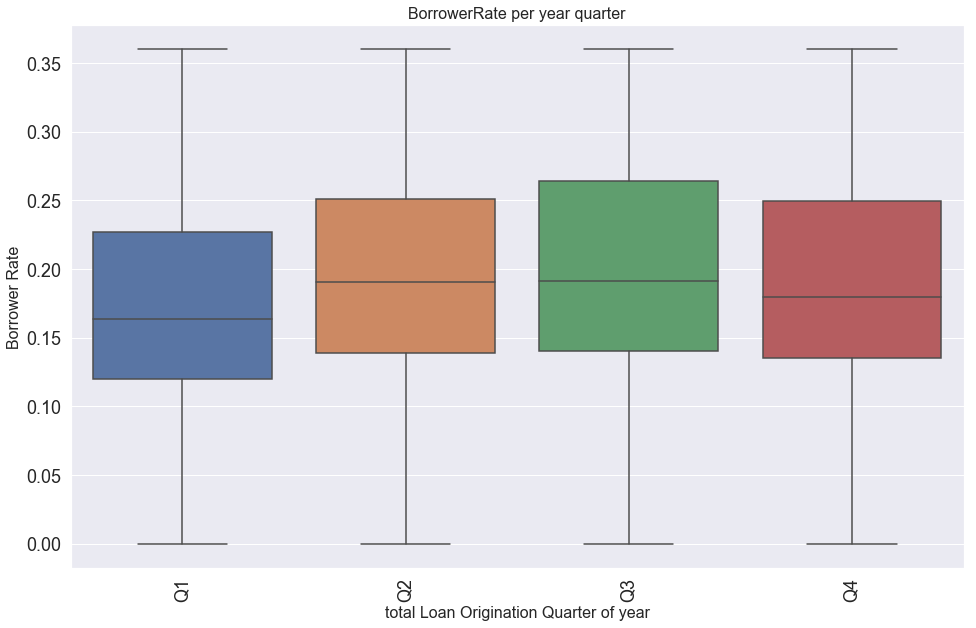

In [6]:
# the relation between the quater of the year and the borrowerRate

plt.figure(figsize=(16,10))
ax = sb.boxplot(data=df, y='BorrowerRate', x='LoanOriginationQuarterofyear', order=['Q1','Q2','Q3','Q4'])
plt.title('BorrowerRate per year quarter', fontsize=16)
plt.ylabel('Borrower Rate', fontsize=16)
plt.xlabel('total Loan Origination Quarter of year', fontsize=16)

plt.xticks(rotation = 90,fontsize=18)
plt.yticks(fontsize=18);


## what's the best length of the loan expressed in months?
> as shown if u want to take a loan with the lower interest rate it's better to take it in term 12 months.

In [7]:
df.groupby('Term')['BorrowerRate'].mean()

Term
12    0.143896
36    0.191448
60    0.191809
Name: BorrowerRate, dtype: float64

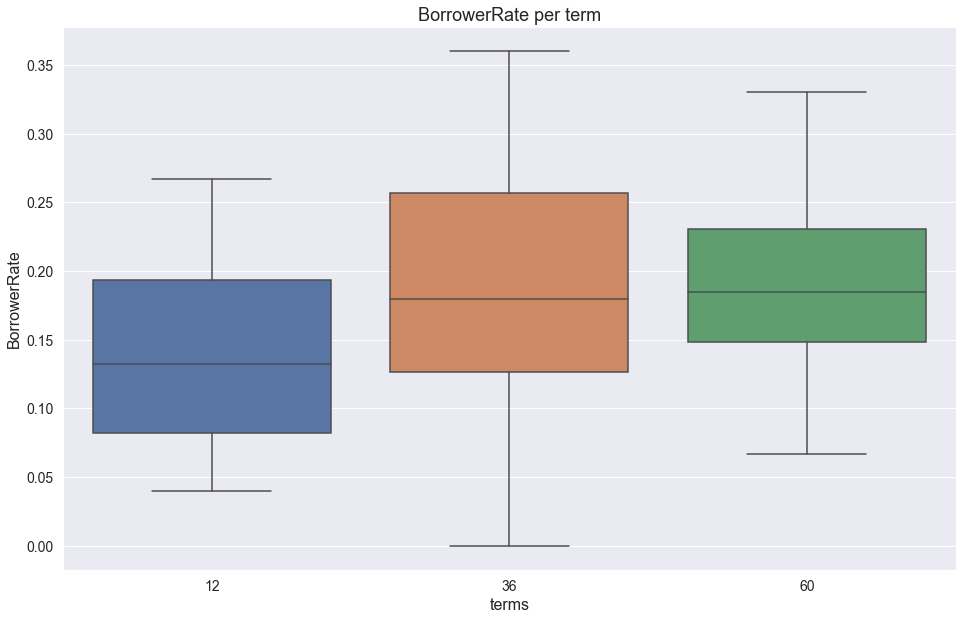

In [8]:
# the relation between the term and the borrowerRate

plt.figure(figsize=(16,10))
ax = sb.boxplot(data=df, x='Term', y='BorrowerRate')
plt.title('BorrowerRate per term', fontsize=18)
plt.xlabel('terms', fontsize=16)
plt.ylabel('BorrowerRate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

# what's the relation between the amount of loan and the interest rate?
> there's a week relation in the other direction and that's mean the amount of loan don't affect the interest rate.

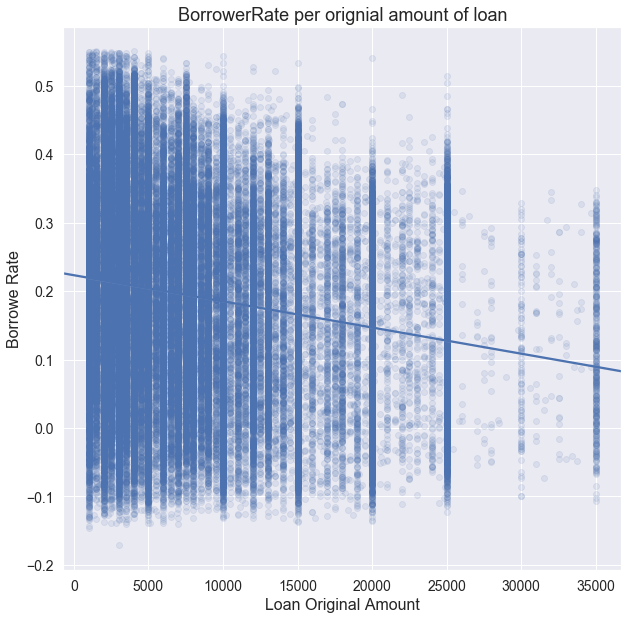

In [9]:
# the relation between the LoanOriginalAmount and BorrowerRate
plt.figure(figsize = [10, 10])
sb.regplot(data = df,x_jitter = 0.2, y_jitter = 0.2, x = 'LoanOriginalAmount', y = 'BorrowerRate',scatter_kws = {'alpha' : 1/10})
plt.xlabel('Loan Original Amount', fontsize=16)
plt.ylabel('Borrowe Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('BorrowerRate per orignial amount of loan', fontsize=18)
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert loan_analysis_slide.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

So, If you want to take a loan and want it with the lowest cost
> you can take it in the first part of the year and for 12 months Term.

# Thank You 